In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('auto.csv')

Top 20 cars with low predicted emissions:
                             name   mpg  cylinders  displacement  horsepower  \
53                    datsun 1200  35.0          4          72.0          69   
142                 toyota corona  31.0          4          76.0          52   
339                toyota starlet  39.1          4          79.0          58   
52            toyota corolla 1200  31.0          4          71.0          65   
341              honda civic 1300  35.1          4          81.0          60   
179              honda civic cvcc  33.0          4          91.0          53   
196                   honda civic  33.0          4          91.0          53   
129           toyota corolla 1200  32.0          4          71.0          65   
216                 renault 5 gtl  36.0          4          79.0          58   
246              honda civic cvcc  36.1          4          91.0          60   
116                      fiat 128  29.0          4          68.0          49  

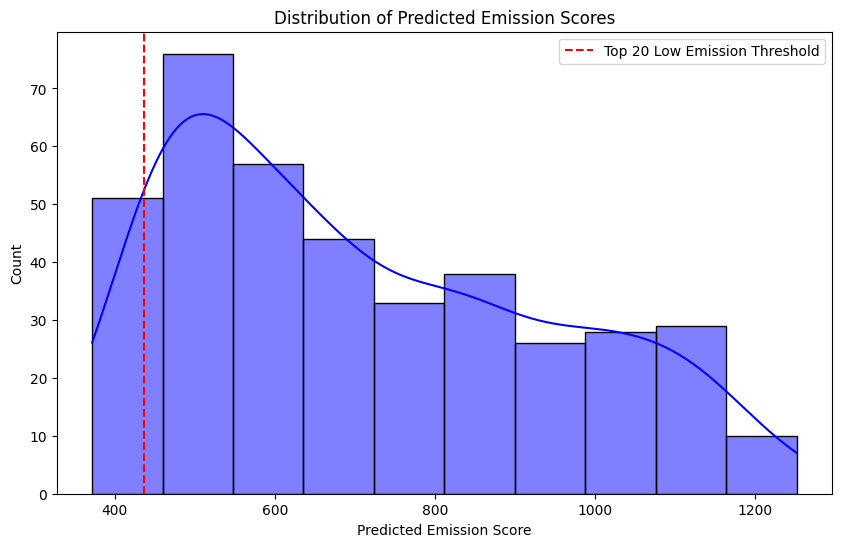


Predicted Emission for the entered car: 373.3300000000002

Top 20 Cars with emissions closest to your input:
                             name   mpg  cylinders  displacement  horsepower  \
53                    datsun 1200  35.0          4          72.0          69   
142                 toyota corona  31.0          4          76.0          52   
339                toyota starlet  39.1          4          79.0          58   
52            toyota corolla 1200  31.0          4          71.0          65   
341              honda civic 1300  35.1          4          81.0          60   
179              honda civic cvcc  33.0          4          91.0          53   
196                   honda civic  33.0          4          91.0          53   
129           toyota corolla 1200  32.0          4          71.0          65   
216                 renault 5 gtl  36.0          4          79.0          58   
246              honda civic cvcc  36.1          4          91.0          60   
116       

In [2]:


# Ensure the dataset has a column for 'name' of the car
# If the dataset does not have a column for the car names, add it.
# For example:
# data['car_name'] = ... (you would need to have this column in your dataset)

# Assuming 'car_name' is the column containing car names
# If the dataset does not have a 'car_name' column, you can create one manually or load from the dataset.

# Define features and target
X = data[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']]
y = data['emission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(model, 'random_forest_model.pkl')

# Predict emission scores for the full dataset
data['predicted_emission'] = model.predict(X)

# Filter top 20 cars with the lowest predicted emissions
top_20_low_emission_cars = data.sort_values(by='predicted_emission').head(20)

# Show the filtered dataset with car names
print("Top 20 cars with low predicted emissions:")
print(top_20_low_emission_cars[['name', 'mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin', 'predicted_emission']])

# Optional: Plot distribution of predicted emissions
plt.figure(figsize=(10, 6))
sns.histplot(data['predicted_emission'], kde=True, color='blue')
plt.axvline(top_20_low_emission_cars['predicted_emission'].iloc[-1], color='red', linestyle='--', label="Top 20 Low Emission Threshold")
plt.title("Distribution of Predicted Emission Scores")
plt.xlabel("Predicted Emission Score")
plt.legend()
plt.show()

# Get user inputs for prediction
def get_user_input():
    # Assuming the user provides input for each feature
    mpg = float(input("Enter MPG: "))
    cylinders = int(input("Enter Number of Cylinders: "))
    displacement = float(input("Enter Displacement: "))
    horsepower = float(input("Enter Horsepower: "))
    weight = float(input("Enter Weight: "))
    acceleration = float(input("Enter Acceleration: "))
    year = int(input("Enter Model Year: "))
    origin = int(input("Enter Origin (1 = USA, 2 = Europe, 3 = Japan): "))

    return [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin]

# Make prediction for user input
user_input = get_user_input()
user_input_df = pd.DataFrame([user_input], columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin'])
user_predicted_emission = model.predict(user_input_df)

print(f"\nPredicted Emission for the entered car: {user_predicted_emission[0]}")

# Find cars with emissions closest to the predicted value
data['emission_diff'] = abs(data['predicted_emission'] - user_predicted_emission[0])
similar_cars = data.sort_values(by='emission_diff').head(20)

# Display the most similar cars to the user's input, including car names
print("\nTop 20 Cars with emissions closest to your input:")
print(similar_cars[['name', 'mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin', 'predicted_emission']])
